### Objective:Design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. 
### By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning

## Basic Data Exploration

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder 
data=pd.read_csv("E:/entri/DSML projects/ml/Employee.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [4]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [5]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,130.0,30.484615,11.096640,0.0,22.0,32.5,37.75,54.0
Salary,124.0,5312.467742,2573.764683,1089.0,3030.0,5000.0,8000.00,9876.0
Gender,148.0,0.222973,0.417654,0.0,0.0,0.0,0.00,1.0


In [6]:
# Descriptive analysis of Categorical Variables only.
data.describe(include=object)

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [7]:
# Unique values in Company and its length.

com_unq=data['Company'].unique()
len(com_unq) ,com_unq

(7,
 array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
        'Congnizant', 'Infosys Pvt Lmt'], dtype=object))

In [8]:
# Unique values in Place and its length.
uniq_palce= data['Place'].unique()
uniq_palce, len(uniq_palce)


(array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
        nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
       dtype=object),
 12)

In [9]:
# Unique values in Country and its length.
uniq_Country=data['Place'].unique()
uniq_Country, len(uniq_Country)

(array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
        nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
       dtype=object),
 12)

In [10]:
#Rename Columns
new_name_columns={
    'Company':'company',
    'Age':'age',
    'Salary':'salary',
    'Place':'place',
    'Country':'country',
    'Gender': 'gender'}
data.rename(columns=new_name_columns,inplace=True)
data.columns


Index(['company', 'age', 'salary', 'place', 'country', 'gender'], dtype='object')


### Data Cleaning

In [11]:
data.isnull().sum()

company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64

In [12]:
#removing null values from company and places
datas=data.dropna(subset=['company','place'])


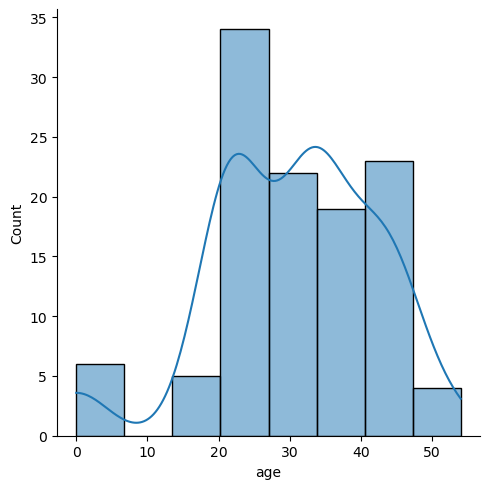

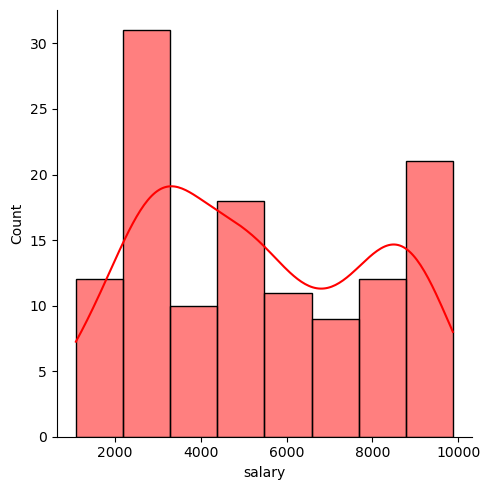

In [13]:
sns.displot(datas['age'],kde=True)
sns.displot(data['salary'],kde=True,color='r')

In [14]:
#finding mean of age
age_m=datas['age'].mean()
age_m


30.513274336283185

C:\Users\DELL\AppData\Local\Temp\ipykernel_16916\950280289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datas['age'].fillna(datas['age'].mean(),inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16916\950280289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['age'].fillna(datas['age'].mean(),inplace=True)


<Axes: xlabel='age'>

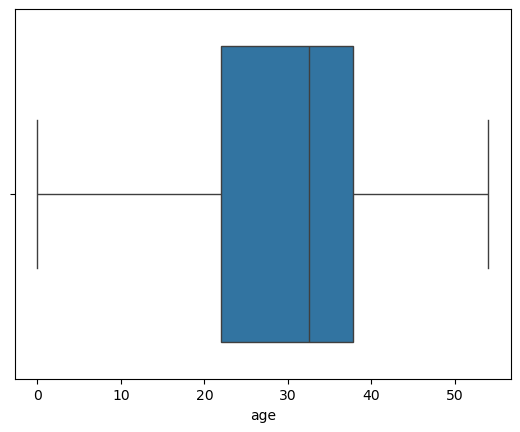

In [15]:
#filling missing values with mean
datas['age'].fillna(datas['age'].mean(),inplace=True)
datas['age'].isnull().sum()
sns.boxplot(data['age'],orient='h')

In [17]:
# finding mean of salary
salary_m=datas['salary'].mean()
salary_m

5052.785046728972

C:\Users\DELL\AppData\Local\Temp\ipykernel_16916\1124341760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datas['salary'].fillna(datas['salary'].mean(),inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16916\1124341760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['salary'].fillna(datas['salary'].mean(),inplace=True)


<Axes: xlabel='salary'>

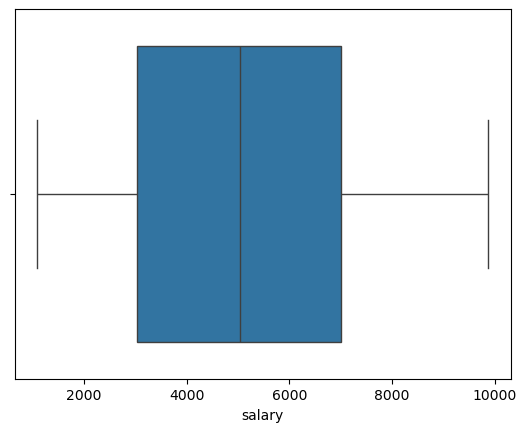

In [18]:
#filling null values with mean
datas['salary'].fillna(datas['salary'].mean(),inplace=True)
datas['salary'].isnull().sum()
sns.boxplot(datas['salary'],orient='h')

### Outlier Detection using IQR

C:\Users\DELL\Anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<Axes: >

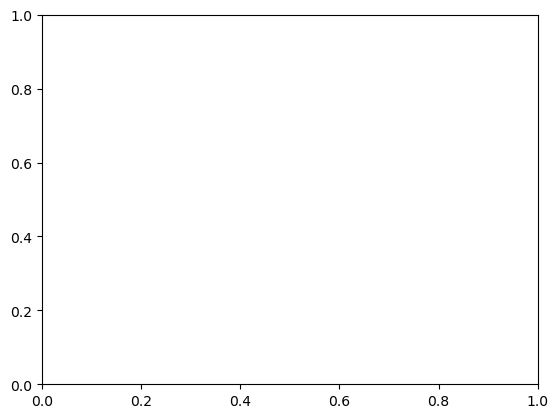

In [19]:
q1=datas['salary'].quantile(0.25)
q3=datas['salary'].quantile(0.75)

iqr=q3-q1

lower= q1 - iqr*1.5
upper= q3 + iqr*1.5

OUT= datas[(datas['salary']>upper) & (datas['salary']<lower)]
sns.boxplot(x=OUT['salary'],orient='h')

C:\Users\DELL\Anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<Axes: >

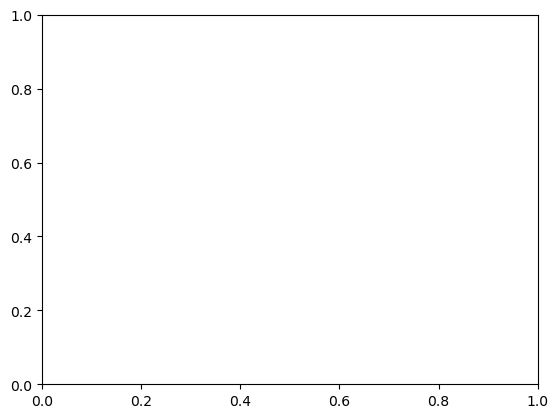

In [20]:
q1=datas['age'].quantile(0.25)
q3=datas['age'].quantile(0.75)

iqr=q3-q1

lower=q1-iqr*3
upper=q3+iqr*3

outliers=datas[(datas['age']<lower)&(datas['age']>upper)]
sns.boxplot(x=outliers['age'],orient='h')

## Data Analysis 
#Filter the data with age >40 and salary<5000

In [21]:
filter= datas[(datas['age']>40) & (datas['salary']<5000)]
filter

,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


## Plot the chart with age and salary

<Axes: xlabel='age', ylabel='salary'>

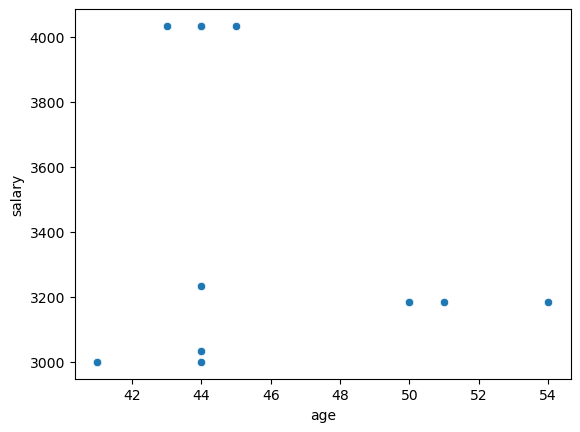

In [22]:
sns.scatterplot(x='age',y='salary',data=filter)

<Axes: xlabel='age', ylabel='salary'>

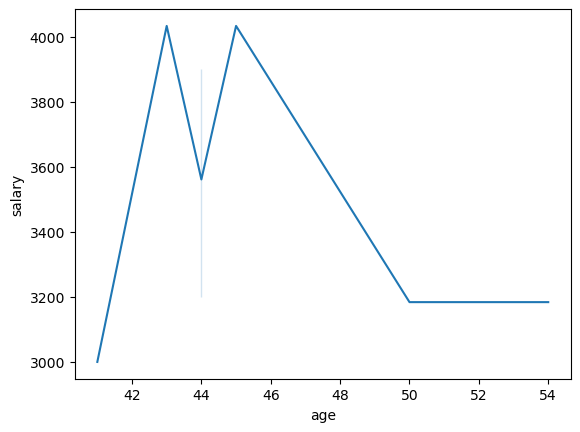

In [24]:
sns.lineplot(x='age',y='salary',data=filter)

In [25]:
pla=filter['place'].value_counts()
pla

place
Delhi        4
Mumbai       4
Calcutta     2
Hyderabad    2
Cochin       2
Chennai      1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

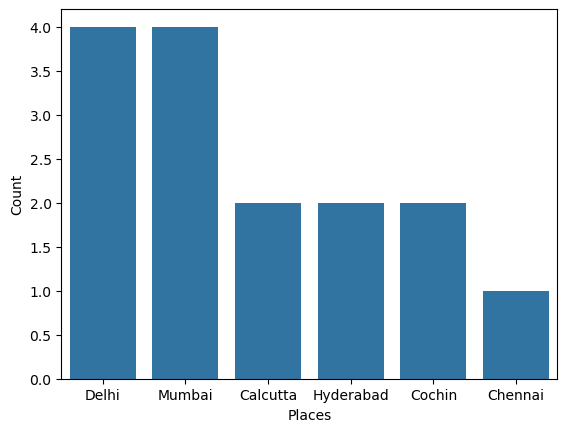

In [26]:
sns.barplot(x=pla.index ,y=pla.values)
plt.xlabel('Places')
plt.ylabel('Count')

## Label Encoding-(Places/Country/Company)

In [27]:
# Place
label_encode=LabelEncoder()
dat=datas.copy()
dat['Comp_name']= label_encode.fit_transform(datas['company'])
dat['Places']=label_encode.fit_transform(datas['place'])
dat['Countries']=label_encode.fit_transform(datas['country'])
df1=dat.drop(columns=['company','place','country'])
df1

,age,salary,gender,Comp_name,Places,Countries
0,20.0,5052.785047,0,4,2,0
1,30.0,5052.785047,0,2,6,0
2,35.0,2300.000000,0,4,1,0
3,40.0,3000.000000,0,2,4,0
4,23.0,4000.000000,0,4,6,0
...,...,...,...,...,...,...
143,33.0,9024.000000,1,4,1,0
144,22.0,8787.000000,1,2,1,0
145,44.0,4034.000000,1,2,4,0
146,33.0,5034.000000,1,4,6,0


## One Hot Label-(Places/Country/Company)

In [28]:
one=onehot()
df=datas.copy()
df2=pd.get_dummies(datas,columns=['company','place','country'])
df2

,age,salary,gender,company_CTS,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Bhopal,...,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune,country_India
0,20.0,5052.785047,0,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,30.0,5052.785047,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.000000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.000000,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.000000,0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,33.0,9024.000000,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
144,22.0,8787.000000,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.000000,1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
146,33.0,5034.000000,1,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


# Standardscaler

In [29]:
#Standardscaler of df1
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
features=['age','salary','gender','Comp_name','Places','Countries']
df11=df1.copy()
df11[features]=std.fit_transform(df1[features])
df11.std()
df11.mean()

age          2.709993e-17
salary       5.419986e-17
gender      -4.458376e-17
Comp_name   -6.556435e-18
Places       2.666284e-17
Countries    0.000000e+00
dtype: float64

In [30]:
#Standardscalar of df2
features=['age','salary','gender','company_CTS','company_Congnizant','company_Infosys','company_Infosys Pvt Lmt','company_TCS',	'company_Tata Consultancy Services','place_Bhopal','place_Chennai','place_Cochin','place_Delhi','place_Hyderabad','place_Mumbai','place_Nagpur','place_Noida','place_Podicherry','place_Pune','country_India']
df11=df2.copy()
df11[features]=std.fit_transform(df2[features])
df11.mean()

age                                  2.709993e-17
salary                               5.419986e-17
gender                              -4.458376e-17
company_CTS                          3.321927e-17
company_Congnizant                  -1.092739e-17
company_Infosys                     -1.398706e-16
company_Infosys Pvt Lmt             -1.792092e-17
company_TCS                          0.000000e+00
company_Tata Consultancy Services   -3.081525e-17
place_Bhopal                        -1.682818e-17
place_Calcutta                       2.440945e-01
place_Chennai                        8.741914e-19
place_Cochin                        -2.797412e-17
place_Delhi                         -3.147089e-17
place_Hyderabad                      0.000000e+00
place_Mumbai                         7.168369e-17
place_Nagpur                        -1.682818e-17
place_Noida                         -1.792092e-17
place_Podicherry                     1.704673e-17
place_Pune                          -2.491445e-17


# MinMax Scaler


In [31]:
#MinMax of df1
from sklearn.preprocessing import MinMaxScaler
min=MinMaxScaler()
df12=df1.copy()
features=['age','salary','gender','Comp_name','Places','Countries']
df12[features] = min.fit_transform(df1[features])
df12



,age,salary,gender,Comp_name,Places,Countries
0,0.370370,0.451097,0.0,0.8,0.2,0.0
1,0.555556,0.451097,0.0,0.4,0.6,0.0
2,0.648148,0.137817,0.0,0.8,0.1,0.0
3,0.740741,0.217480,0.0,0.4,0.4,0.0
4,0.425926,0.331285,0.0,0.8,0.6,0.0
...,...,...,...,...,...,...
143,0.611111,0.903039,1.0,0.8,0.1,0.0
144,0.407407,0.876067,1.0,0.4,0.1,0.0
145,0.814815,0.335154,1.0,0.4,0.4,0.0
146,0.611111,0.448959,1.0,0.8,0.6,0.0


In [32]:
df21=df2.copy()
features=['age','salary','gender','company_CTS','company_Congnizant','company_Infosys','company_Infosys Pvt Lmt','company_TCS',	'company_Tata Consultancy Services','place_Bhopal','place_Chennai','place_Cochin','place_Delhi','place_Hyderabad','place_Mumbai','place_Nagpur','place_Noida','place_Podicherry','place_Pune','country_India']
df21[features] = min.fit_transform(df2[features])
df21

,age,salary,gender,company_CTS,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Bhopal,...,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune,country_India
0,0.370370,0.451097,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.555556,0.451097,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.648148,0.137817,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.740741,0.217480,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.425926,0.331285,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.611111,0.903039,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,0.407407,0.876067,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,0.814815,0.335154,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.611111,0.448959,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
